In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter 
from matplotlib.colors import LogNorm
import re


phi_default = 0.0
num_delta = 400
num_phi   = 400
delta_vals = np.linspace(0.0, np.pi, num_delta)
phi_vals   = np.linspace(0.0, np.pi, num_phi)
Delta, Phi = np.meshgrid(delta_vals, phi_vals, indexing="xy")
 
delta_plot = np.linspace(0.0, np.pi, 400)
Phi_plot   = np.full_like(delta_plot, phi_default)
 
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C', '#E67E22', '#34495E']
linestyles = ['-', '--', '-.', '--', ':', '--', '-.', ':']
markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'h']
marker_sizes = [4, 4, 4, 4, 4, 4, 4, 4]
marker_every = [10, 12, 14, 16, 18, 20, 22, 24]
threshold = 1e-10
 
def code1_sum_abs_diff(Delta, Phi, k1, k2, t): 
    k1c, k2c, tc = k1, k2, t
    c2 = np.cos(2.0 * Delta)
    c4 = np.cos(4.0 * Delta)
    s2 = np.sin(2.0 * Delta)
    sqrt_k1t = np.sqrt(k1c * tc)
    sqrt_k2t = np.sqrt(k2c * tc)
    k1t = k1c * tc
    k2t = k2c * tc

    total = np.zeros_like(Delta, dtype=np.complex128)

    # E1dE1
    o00 = 0.5 * (2*tc**2*c2*(k1c**2 - k2c**2) + 7*k1c**2*tc**2 - tc**2*c4*(k1c - k2c)**2 + 6*k1c*k2c*tc**2 - 4*k1c*tc + 7*k2c**2*tc**2 - 4*k2c*tc + 2)
    o11 = 0.5 * (-2*tc**2*c2*(k1c**2 - k2c**2) + 7*k1c**2*tc**2 - tc**2*c4*(k1c - k2c)**2 + 6*k1c*k2c*tc**2 - 4*k1c*tc + 7*k2c**2*tc**2 - 4*k2c*tc + 2)
    total += np.abs(o00 - o11)
    # E2dE2
    o00 = k1c*tc*(tc*c4*(k1c-k2c) - 2*k1c*tc*c2 - 6*k1c*tc - 3*k2c*tc + 2)
    o11 = k1c*tc*(tc*c4*(k1c-k2c) + 2*k1c*tc*c2 - 6*k1c*tc - 3*k2c*tc + 2)
    total += np.abs(o00 - o11)
    # E2dE3
    o00 = tc * (-np.exp(1j*Phi)) * s2 * sqrt_k1t * sqrt_k2t * (2*c2*(k1c-k2c) - k1c - k2c)
    o11 = tc * (-np.exp(1j*Phi)) * s2 * sqrt_k1t * sqrt_k2t * (2*c2*(k1c-k2c) + k1c + k2c)
    total += np.abs(o00 - o11)
    # E3dE3
    o00 = k2c*tc*(-tc*c4*(k1c-k2c) - 3*k1c*tc + 2*k2c*tc*c2 - 6*k2c*tc + 2)
    o11 = k2c*tc*(-tc*c4*(k1c-k2c) - 3*k1c*tc - 2*k2c*tc*c2 - 6*k2c*tc + 2)
    total += np.abs(o00 - o11)
    # E4dE5
    o00 = (np.exp(-1j*Phi) * s2 * (2*c2 - 1) * (k1t)**1.5 * sqrt_k2t) / np.sqrt(2.0)
    o11 = (np.exp(-1j*Phi) * s2 * (2*c2 + 1) * (k1t)**1.5 * sqrt_k2t) / np.sqrt(2.0)
    total += np.abs(o00 - o11)
    # E4dE6
    o00 = -(np.exp(1j*Phi) * s2 * (2*c2 + 1) * sqrt_k1t * (k2t)**1.5) / np.sqrt(2.0)
    o11 = -(np.exp(1j*Phi) * s2 * (2*c2 - 1) * sqrt_k1t * (k2t)**1.5) / np.sqrt(2.0)
    total += np.abs(o00 - o11)
    # E5dE5
    o00 = -0.5 * k1c**2 * tc**2 * (-2*c2 + c4 - 5)
    o11 = -0.5 * k1c**2 * tc**2 * ( 2*c2 + c4 - 5)
    total += np.abs(o00 - o11)
    # E6dE6
    o00 = -0.5 * k2c**2 * tc**2 * ( 2*c2 + c4 - 5)
    o11 = -0.5 * k2c**2 * tc**2 * (-2*c2 + c4 - 5)
    total += np.abs(o00 - o11)

    return total.real

def code2_sum_abs_diff(Delta, Phi, k1, k2, t): 
    k1c, k2c, tc = k1, k2, t
    c2 = np.cos(2.0 * Delta)
    c4 = np.cos(4.0 * Delta)
    s2 = np.sin(2.0 * Delta)
    sqrt_k1t = np.sqrt(k1c * tc)
    sqrt_k2t = np.sqrt(k2c * tc)
    k1t = k1c * tc
    k2t = k2c * tc

    total = np.zeros_like(Delta, dtype=np.complex128)

    # E1dE1
    o00 = 0.5 * (8*tc**2*c2*(k1c**2 - k2c**2) + 27*k1c**2*tc**2 - 3*tc**2*c4*(k1c - k2c)**2 + 26*k1c*k2c*tc**2 - 8*k1c*tc + 27*k2c**2*tc**2 - 8*k2c*tc + 2)
    o11 = 0.5 * (-8*tc**2*c2*(k1c**2 - k2c**2) + 27*k1c**2*tc**2 - 3*tc**2*c4*(k1c - k2c)**2 + 26*k1c*k2c*tc**2 - 8*k1c*tc + 27*k2c**2*tc**2 - 8*k2c*tc + 2)
    total += np.abs(o00 - o11)
    # E2dE2
    o00 = k1c*tc*(3*tc*c4*(k1c-k2c) - 8*k1c*tc*c2 - 25*k1c*tc - 13*k2c*tc + 4)
    o11 = k1c*tc*(3*tc*c4*(k1c-k2c) + 8*k1c*tc*c2 - 25*k1c*tc - 13*k2c*tc + 4)
    total += np.abs(o00 - o11)
    # E2dE3
    o00 = -2*tc * np.exp(1j*Phi) * s2 * sqrt_k1t * sqrt_k2t * (3*c2*(k1c-k2c) - 2*(k1c+k2c))
    o11 = -2*tc * np.exp(1j*Phi) * s2 * sqrt_k1t * sqrt_k2t * (3*c2*(k1c-k2c) + 2*(k1c+k2c))
    total += np.abs(o00 - o11)
    # E3dE3
    o00 = k2c*tc*(-3*tc*c4*(k1c-k2c) - 13*k1c*tc + 8*k2c*tc*c2 - 25*k2c*tc + 4)
    o11 = k2c*tc*(-3*tc*c4*(k1c-k2c) - 13*k1c*tc - 8*k2c*tc*c2 - 25*k2c*tc + 4)
    total += np.abs(o00 - o11)
    # E4dE5
    o00 = np.sqrt(2.0) * np.exp(-1j*Phi) * s2 * (3*c2 - 2) * (k1t)**1.5 * sqrt_k2t
    o11 = np.sqrt(2.0) * np.exp(-1j*Phi) * s2 * (3*c2 + 2) * (k1t)**1.5 * sqrt_k2t
    total += np.abs(o00 - o11)
    # E4dE6
    o00 = -np.sqrt(2.0) * np.exp(1j*Phi) * s2 * (3*c2 + 2) * sqrt_k1t * (k2t)**1.5
    o11 = -np.sqrt(2.0) * np.exp(1j*Phi) * s2 * (3*c2 - 2) * sqrt_k1t * (k2t)**1.5
    total += np.abs(o00 - o11)
    # E5dE5
    o00 = 0.5 * k1c**2 * tc**2 * (8*c2 - 3*c4 + 23)
    o11 = -0.5 * k1c**2 * tc**2 * (8*c2 + 3*c4 - 23)
    total += np.abs(o00 - o11)
    # E6dE6
    o00 = -0.5 * k2c**2 * tc**2 * (8*c2 + 3*c4 - 23)
    o11 =  0.5 * k2c**2 * tc**2 * (8*c2 - 3*c4 + 23)
    total += np.abs(o00 - o11)

    return total.real

def get_operator_terms_N2(Delta, Phi, k1, k2, t): 
    k1c, k2c, tc = k1, k2, t
    c2 = np.cos(2.0 * Delta)
    c4 = np.cos(4.0 * Delta)
    s2 = np.sin(2.0 * Delta)
    sqrt_k1t = np.sqrt(k1c * tc)
    sqrt_k2t = np.sqrt(k2c * tc)
    k1t = k1c * tc
    k2t = k2c * tc
     
    terms = {}
     
    o00 = 0.5 * (2*tc**2*c2*(k1c**2 - k2c**2) + 7*k1c**2*tc**2 - tc**2*c4*(k1c - k2c)**2 + 6*k1c*k2c*tc**2 - 4*k1c*tc + 7*k2c**2*tc**2 - 4*k2c*tc + 2)
    o11 = 0.5 * (-2*tc**2*c2*(k1c**2 - k2c**2) + 7*k1c**2*tc**2 - tc**2*c4*(k1c - k2c)**2 + 6*k1c*k2c*tc**2 - 4*k1c*tc + 7*k2c**2*tc**2 - 4*k2c*tc + 2)
    terms['E1dE1'] = np.abs(o00 - o11)
     
    o00 = k1c*tc*(tc*c4*(k1c-k2c) - 2*k1c*tc*c2 - 6*k1c*tc - 3*k2c*tc + 2)
    o11 = k1c*tc*(tc*c4*(k1c-k2c) + 2*k1c*tc*c2 - 6*k1c*tc - 3*k2c*tc + 2)
    terms['E2dE2'] = np.abs(o00 - o11)
     
    o00 = tc * (-np.exp(1j*Phi)) * s2 * sqrt_k1t * sqrt_k2t * (2*c2*(k1c-k2c) - k1c - k2c)
    o11 = tc * (-np.exp(1j*Phi)) * s2 * sqrt_k1t * sqrt_k2t * (2*c2*(k1c-k2c) + k1c + k2c)
    terms['E2dE3'] = np.abs(o00 - o11)
     
    o00 = k2c*tc*(-tc*c4*(k1c-k2c) - 3*k1c*tc + 2*k2c*tc*c2 - 6*k2c*tc + 2)
    o11 = k2c*tc*(-tc*c4*(k1c-k2c) - 3*k1c*tc - 2*k2c*tc*c2 - 6*k2c*tc + 2)
    terms['E3dE3'] = np.abs(o00 - o11)
     
    o00 = (np.exp(-1j*Phi) * s2 * (2*c2 - 1) * (k1t)**1.5 * sqrt_k2t) / np.sqrt(2.0)
    o11 = (np.exp(-1j*Phi) * s2 * (2*c2 + 1) * (k1t)**1.5 * sqrt_k2t) / np.sqrt(2.0)
    terms['E4dE5'] = np.abs(o00 - o11)
     
    o00 = -(np.exp(1j*Phi) * s2 * (2*c2 + 1) * sqrt_k1t * (k2t)**1.5) / np.sqrt(2.0)
    o11 = -(np.exp(1j*Phi) * s2 * (2*c2 - 1) * sqrt_k1t * (k2t)**1.5) / np.sqrt(2.0)
    terms['E4dE6'] = np.abs(o00 - o11)
     
    o00 = -0.5 * k1c**2 * tc**2 * (-2*c2 + c4 - 5)
    o11 = -0.5 * k1c**2 * tc**2 * ( 2*c2 + c4 - 5)
    terms['E5dE5'] = np.abs(o00 - o11)
     
    o00 = -0.5 * k2c**2 * tc**2 * ( 2*c2 + c4 - 5)
    o11 = -0.5 * k2c**2 * tc**2 * (-2*c2 + c4 - 5)
    terms['E6dE6'] = np.abs(o00 - o11)
     
    return terms

def get_operator_terms_N4(Delta, Phi, k1, k2, t): 
    k1c, k2c, tc = k1, k2, t
    c2 = np.cos(2.0 * Delta)
    c4 = np.cos(4.0 * Delta)
    s2 = np.sin(2.0 * Delta)
    sqrt_k1t = np.sqrt(k1c * tc)
    sqrt_k2t = np.sqrt(k2c * tc)
    k1t = k1c * tc
    k2t = k2c * tc
     
    terms = {}
     
    o00 = 0.5 * (8*tc**2*c2*(k1c**2 - k2c**2) + 27*k1c**2*tc**2 - 3*tc**2*c4*(k1c - k2c)**2 + 26*k1c*k2c*tc**2 - 8*k1c*tc + 27*k2c**2*tc**2 - 8*k2c*tc + 2)
    o11 = 0.5 * (-8*tc**2*c2*(k1c**2 - k2c**2) + 27*k1c**2*tc**2 - 3*tc**2*c4*(k1c - k2c)**2 + 26*k1c*k2c*tc**2 - 8*k1c*tc + 27*k2c**2*tc**2 - 8*k2c*tc + 2)
    terms['E1dE1'] = np.abs(o00 - o11)
     
    o00 = k1c*tc*(3*tc*c4*(k1c-k2c) - 8*k1c*tc*c2 - 25*k1c*tc - 13*k2c*tc + 4)
    o11 = k1c*tc*(3*tc*c4*(k1c-k2c) + 8*k1c*tc*c2 - 25*k1c*tc - 13*k2c*tc + 4)
    terms['E2dE2'] = np.abs(o00 - o11)
     
    o00 = -2*tc * np.exp(1j*Phi) * s2 * sqrt_k1t * sqrt_k2t * (3*c2*(k1c-k2c) - 2*(k1c+k2c))
    o11 = -2*tc * np.exp(1j*Phi) * s2 * sqrt_k1t * sqrt_k2t * (3*c2*(k1c-k2c) + 2*(k1c+k2c))
    terms['E2dE3'] = np.abs(o00 - o11)
     
    o00 = k2c*tc*(-3*tc*c4*(k1c-k2c) - 13*k1c*tc + 8*k2c*tc*c2 - 25*k2c*tc + 4)
    o11 = k2c*tc*(-3*tc*c4*(k1c-k2c) - 13*k1c*tc - 8*k2c*tc*c2 - 25*k2c*tc + 4)
    terms['E3dE3'] = np.abs(o00 - o11)
     
    o00 = np.sqrt(2.0) * np.exp(-1j*Phi) * s2 * (3*c2 - 2) * (k1t)**1.5 * sqrt_k2t
    o11 = np.sqrt(2.0) * np.exp(-1j*Phi) * s2 * (3*c2 + 2) * (k1t)**1.5 * sqrt_k2t
    terms['E4dE5'] = np.abs(o00 - o11)
     
    o00 = -np.sqrt(2.0) * np.exp(1j*Phi) * s2 * (3*c2 + 2) * sqrt_k1t * (k2t)**1.5
    o11 = -np.sqrt(2.0) * np.exp(1j*Phi) * s2 * (3*c2 - 2) * sqrt_k1t * (k2t)**1.5
    terms['E4dE6'] = np.abs(o00 - o11)
     
    o00 = 0.5 * k1c**2 * tc**2 * (8*c2 - 3*c4 + 23)
    o11 = -0.5 * k1c**2 * tc**2 * (8*c2 + 3*c4 - 23)
    terms['E5dE5'] = np.abs(o00 - o11)
     
    o00 = -0.5 * k2c**2 * tc**2 * (8*c2 + 3*c4 - 23)
    o11 =  0.5 * k2c**2 * tc**2 * (8*c2 - 3*c4 + 23)
    terms['E6dE6'] = np.abs(o00 - o11)
     
    return terms

def format_legend_label(name):  
    pattern = r'E(\d+)dE(\d+)'
    def replace_func(match):
        i, j = match.groups()
        return f'$E_{i}^{{\\dagger}}E_{j}$'
    return re.sub(pattern, replace_func, name)


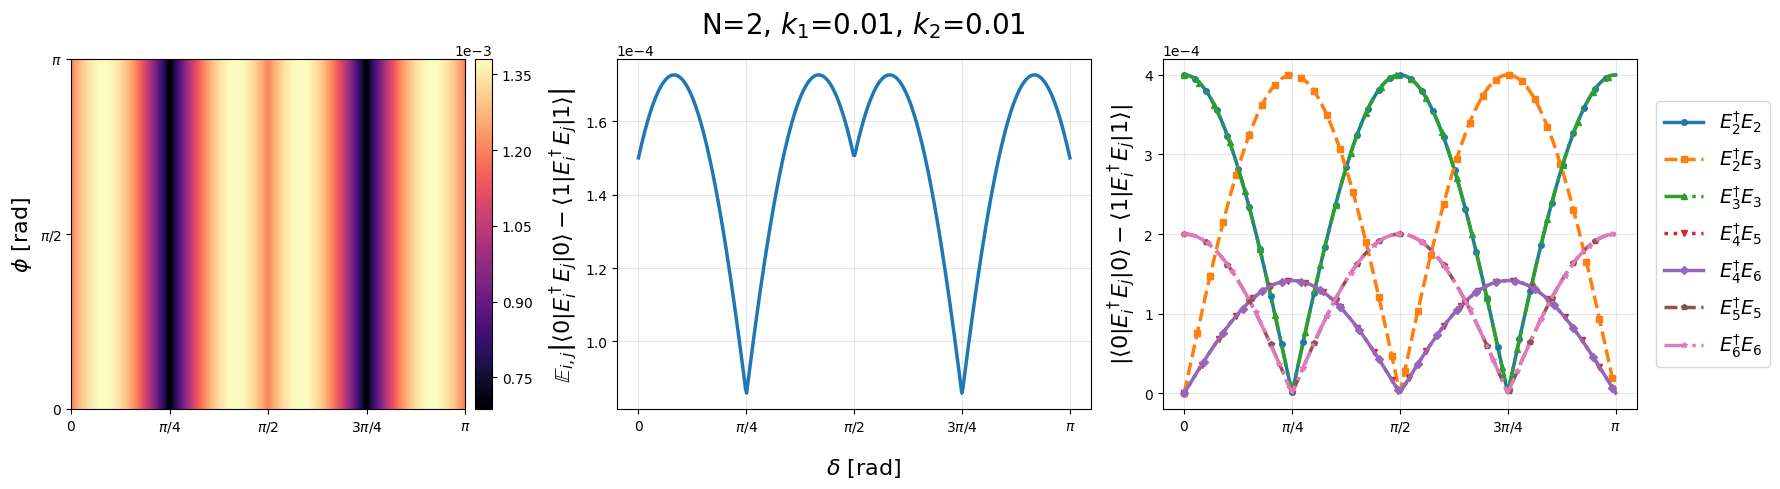

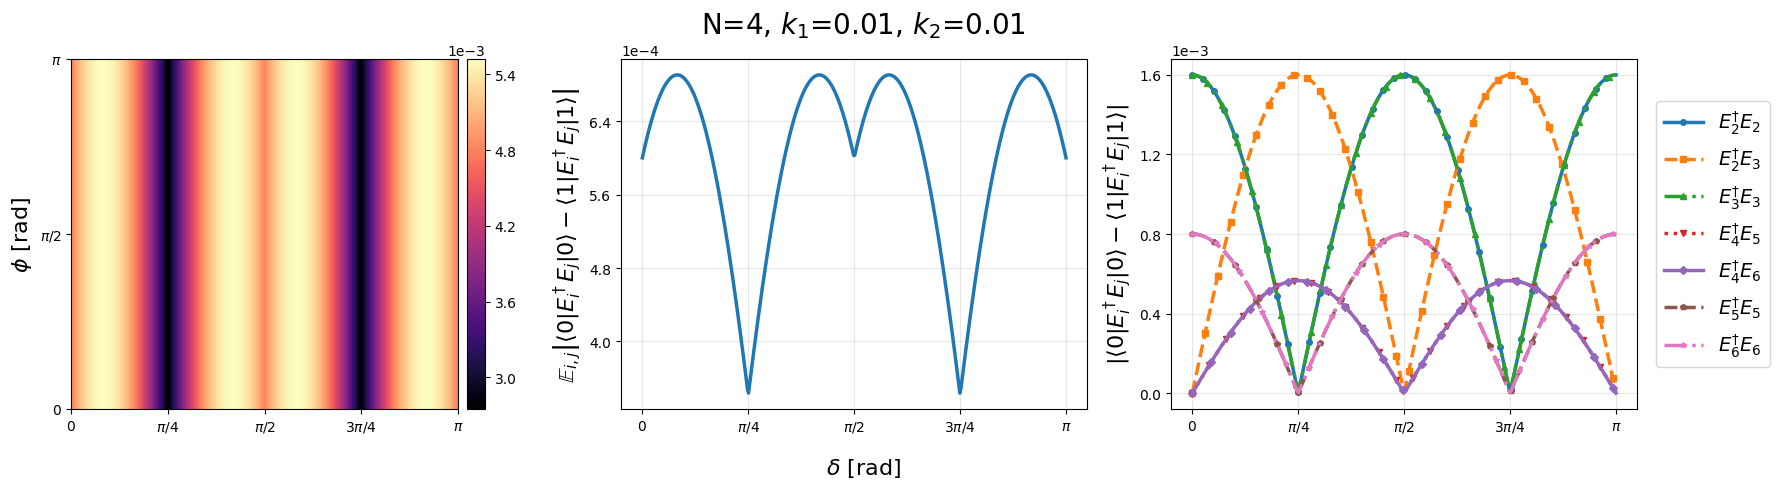

In [101]:
k1 = 0.01
k2 = 0.01  
t  = 1.0 
phi_default = 0.0

# ========================================== 

Z1 = code1_sum_abs_diff(Delta, Phi, k1, k2, t)
Z2 = code2_sum_abs_diff(Delta, Phi, k1, k2, t)
  
phi_idx_0 = np.argmin(np.abs(phi_vals - 0.0))
Z1_phi0 = Z1[phi_idx_0, :] / 8.0  
Z2_phi0 = Z2[phi_idx_0, :] / 8.0  
 
terms_N2 = get_operator_terms_N2(delta_plot, Phi_plot, k1, k2, t)
terms_N4 = get_operator_terms_N4(delta_plot, Phi_plot, k1, k2, t)

# ========================================== 

# ========== N=2 Plot ==========
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=False) 
fig1.subplots_adjust(top=0.85, bottom=0.15, left=0.06, right=0.93, wspace=0.15)

# 1. Heatmap
ax = axes1[0]
im1 = ax.imshow(
    Z1,
    origin="lower",
    extent=[delta_vals[0], delta_vals[-1], phi_vals[0], phi_vals[-1]],
    aspect="auto",
    cmap="magma"
)
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
ax.set_yticks([0, np.pi/2, np.pi])
ax.set_yticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_ylabel(r"$\phi\ \mathrm{[rad]}$", fontsize=16)
cbar1 = fig1.colorbar(im1, ax=ax, location='right', pad=0.02)
cbar1.locator = MaxNLocator(nbins=5)
cbar1.formatter = ScalarFormatter(useMathText=False)
cbar1.formatter.set_scientific(True)
cbar1.formatter.set_powerlimits((0, 0))
cbar1.update_ticks()

# 2. Slice Plot
ax = axes1[1]
ax.plot(delta_vals, Z1_phi0, '-', linewidth=2.5)
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
ax.set_ylabel(r"$\mathbb{E}_{i,j} \left| \langle 0|E_i^\dagger E_j|0\rangle - \langle 1|E_i^\dagger E_j|1\rangle \right|$", fontsize=16)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.grid(True, alpha=0.3)

# 3. Operator Terms Plot
ax = axes1[2]
plotted_N2 = []
legend_handles_N2 = []
legend_labels_N2 = []
color_idx = 0
for name, values in terms_N2.items():
    max_val = np.max(np.abs(values))
    if max_val > threshold:
        line, = ax.plot(delta_plot, values, label=name, 
                        color=colors[color_idx % len(colors)], 
                        linestyle=linestyles[color_idx % len(linestyles)],
                        marker=markers[color_idx % len(markers)],
                        markersize=marker_sizes[color_idx % len(marker_sizes)],
                        markevery=marker_every[color_idx % len(marker_every)],
                        linewidth=2.5)
        plotted_N2.append(name)
        legend_handles_N2.append(line)
        legend_labels_N2.append(format_legend_label(name))
        color_idx += 1
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
ax.set_ylabel(r"$|\langle 0|E_i^\dagger E_j|0\rangle - \langle 1|E_i^\dagger E_j|1\rangle|$", fontsize=16)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.grid(True, alpha=0.3)

if legend_handles_N2:
    axes1[2].legend(legend_handles_N2, legend_labels_N2, 
                    loc='center left', bbox_to_anchor=(1.02, 0.5),
                    fontsize=14, frameon=True)

fig1.text(0.5, 0.95, rf'N=2, $k_1$={k1}, $k_2$={k2}', fontsize=20, ha='center', va='top')
fig1.supxlabel(r"$\delta\ \mathrm{[rad]}$", fontsize=16)

fig1.savefig('combined_N2_1x3_plot.png', dpi=600, bbox_inches='tight')
plt.show()

# ========== N=4 Plot ==========
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=False) 
fig2.subplots_adjust(top=0.85, bottom=0.15, left=0.06, right=0.93, wspace=0.18)

# 1. Heatmap
ax = axes2[0]
im2 = ax.imshow(
    Z2,
    origin="lower",
    extent=[delta_vals[0], delta_vals[-1], phi_vals[0], phi_vals[-1]],
    aspect="auto",
    cmap="magma"
)
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
ax.set_yticks([0, np.pi/2, np.pi])
ax.set_yticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_ylabel(r"$\phi\ \mathrm{[rad]}$", fontsize=16)
cbar2 = fig2.colorbar(im2, ax=ax, location='right', pad=0.02)
cbar2.locator = MaxNLocator(nbins=5)
cbar2.formatter = ScalarFormatter(useMathText=False)
cbar2.formatter.set_scientific(True)
cbar2.formatter.set_powerlimits((0, 0))
cbar2.update_ticks()

# 2. Slice Plot
ax = axes2[1]
ax.plot(delta_vals, Z2_phi0, '-', linewidth=2.5, )
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
ax.set_ylabel(r"$\mathbb{E}_{i,j} \left| \langle 0|E_i^\dagger E_j|0\rangle - \langle 1|E_i^\dagger E_j|1\rangle \right|$", fontsize=16)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.grid(True, alpha=0.3)

# 3. Operator Terms Plot
ax = axes2[2] 
operator_style_map = {}
for idx, name in enumerate(plotted_N2):
    operator_style_map[name] = idx

plotted_N4 = []
legend_handles_N4 = []
legend_labels_N4 = []
for name, values in terms_N4.items():
    max_val = np.max(np.abs(values))
    if max_val > threshold:
        if name in operator_style_map:
            style_idx = operator_style_map[name]
        else:
            style_idx = len(plotted_N4)
        line, = ax.plot(delta_plot, values, label=name, 
                        color=colors[style_idx % len(colors)], 
                        linestyle=linestyles[style_idx % len(linestyles)],
                        marker=markers[style_idx % len(markers)],
                        markersize=marker_sizes[style_idx % len(marker_sizes)],
                        markevery=marker_every[style_idx % len(marker_every)],
                        linewidth=2.5)
        plotted_N4.append(name)
        legend_handles_N4.append(line)
        legend_labels_N4.append(format_legend_label(name))
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
ax.set_ylabel(r"$|\langle 0|E_i^\dagger E_j|0\rangle - \langle 1|E_i^\dagger E_j|1\rangle|$", fontsize=16)
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.grid(True, alpha=0.3)

if legend_handles_N2:
    axes2[2].legend(legend_handles_N2, legend_labels_N2, 
                    loc='center left', bbox_to_anchor=(1.02, 0.5),
                    fontsize=14, frameon=True)

fig2.text(0.5, 0.95, rf'N=4, $k_1$={k1}, $k_2$={k2}', fontsize=20, ha='center', va='top')
fig2.supxlabel(r"$\delta\ \mathrm{[rad]}$", fontsize=16)

fig2.savefig('combined_N4_1x3_plot.png', dpi=600, bbox_inches='tight')
plt.show()


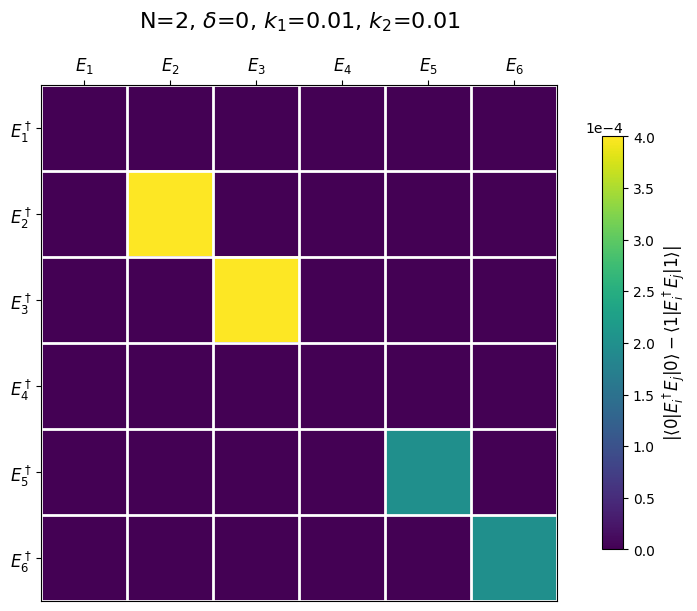

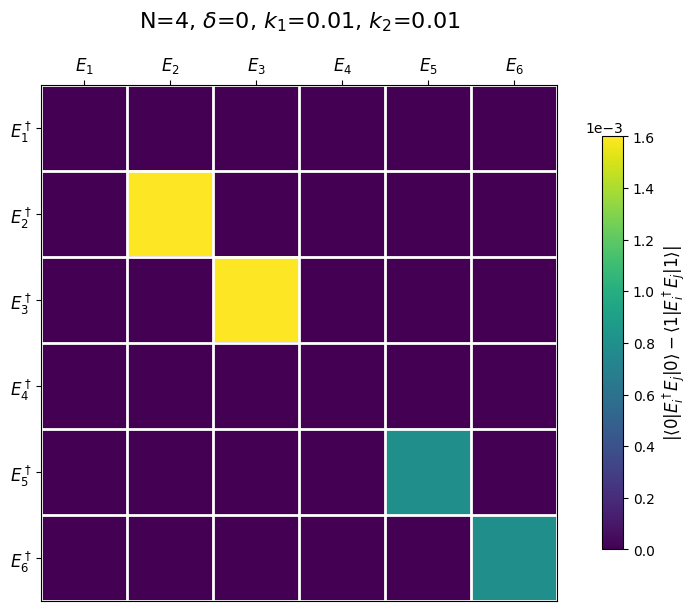

In [62]:
 
k1_val = 0.01
k2_val = 0.01
t_val  = 1.0
phi_val = 0.0       
delta_val = 0.0

# ==========================================

terms_N2 = get_operator_terms_N2(delta_val, phi_val, k1_val, k2_val, t_val)
terms_N4 = get_operator_terms_N4(delta_val, phi_val, k1_val, k2_val, t_val)

num_ops = 6
matrix_N2 = np.zeros((num_ops, num_ops))
matrix_N4 = np.zeros((num_ops, num_ops))

def fill_matrix_scalar(matrix, terms_dict):
    pattern = re.compile(r'E(\d+)dE(\d+)')
    for key, val in terms_dict.items():
        match = pattern.search(key)
        if match:
            i = int(match.group(1)) - 1
            j = int(match.group(2)) - 1
            strength = np.abs(val[0]) if isinstance(val, np.ndarray) else np.abs(val)
            matrix[i, j] = strength
            if i != j:
                matrix[j, i] = strength
    return matrix

matrix_N2 = fill_matrix_scalar(matrix_N2, terms_N2)
matrix_N4 = fill_matrix_scalar(matrix_N4, terms_N4)


def format_delta_label(val):
    if np.isclose(val, 0):
        return r"0"
    elif np.isclose(val, np.pi):
        return r"\pi"
    elif np.isclose(val, np.pi/2):
        return r"\pi/2"
    elif np.isclose(val, np.pi/4):
        return r"\pi/4"
    elif np.isclose(val, 3*np.pi/4):
        return r"3\pi/4"
    elif np.isclose(val, 2*np.pi):
        return r"2\pi"
    else:
        return f"{val:.2f}"

delta_label = format_delta_label(delta_val)

# ==========================================

tick_labels_x = [f'$E_{i}$' for i in range(1, num_ops + 1)]
tick_labels_y = [f'$E_{i}^\dagger$' for i in range(1, num_ops + 1)]


vmin = 1e-10
vmax = max(np.max(matrix_N2), np.max(matrix_N4))
if vmax < vmin: vmax = 1.0


def plot_matrix_individual(matrix, N_val, delta_str):
    fig, ax = plt.subplots(figsize=(7, 6), constrained_layout=True)
    im = ax.imshow(matrix, origin='upper', cmap='viridis')
    
    ax.set_title(rf'N={N_val}, $\delta$={delta_str}, $k_1$={k1}, $k_2$={k2}', fontsize=16, pad=20)
 
    ax.set_xticks(np.arange(num_ops))
    ax.set_yticks(np.arange(num_ops))
    ax.set_xticklabels(tick_labels_x, fontsize=12)
    ax.set_yticklabels(tick_labels_y, fontsize=12)
    
    ax.xaxis.tick_top()            
    ax.xaxis.set_label_position('top') 
    
    ax.set_xticks(np.arange(num_ops + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(num_ops + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False, top=False)
    
    cbar = fig.colorbar(im, ax=ax, shrink=0.8)

    formatter = ScalarFormatter(useMathText=False)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    cbar.ax.yaxis.set_major_formatter(formatter)
    
    cbar.set_label(r'$|\langle 0|E_i^\dagger E_j|0\rangle - \langle 1|E_i^\dagger E_j|1\rangle|$', fontsize=12)
    
    return fig

# --- N=2 ---
fig1 = plot_matrix_individual(matrix_N2, 2, delta_label)
fig1.savefig('matrix_N2.png', dpi=600)

# --- N=4 ---
fig2 = plot_matrix_individual(matrix_N4, 4, delta_label)
fig2.savefig('matrix_N4.png', dpi=600)

plt.show()

/var/folders/14/jdc23vnd7779t2y95qt1rc_00000gn/T/ipykernel_23531/2264976545.py:106: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.85, bottom=0.15, left=0.06, right=0.93, wspace=0.25)
/var/folders/14/jdc23vnd7779t2y95qt1rc_00000gn/T/ipykernel_23531/2264976545.py:106: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.85, bottom=0.15, left=0.06, right=0.93, wspace=0.25)


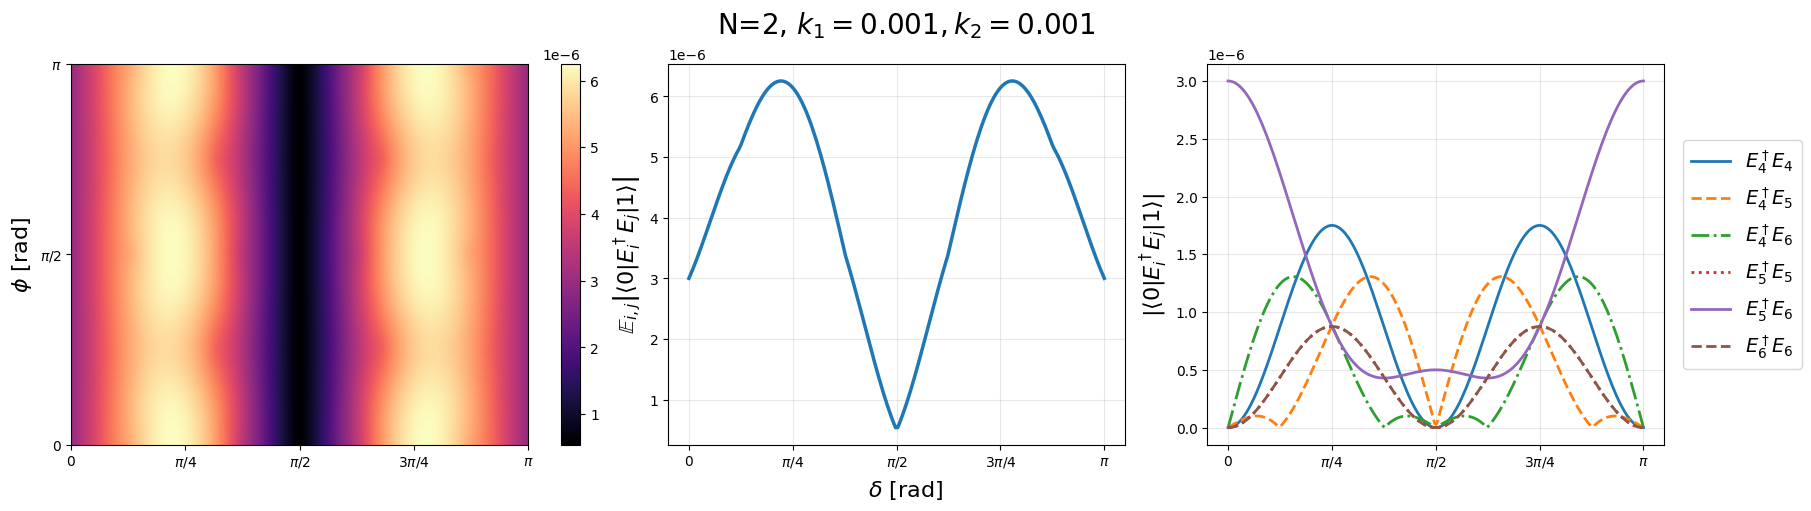

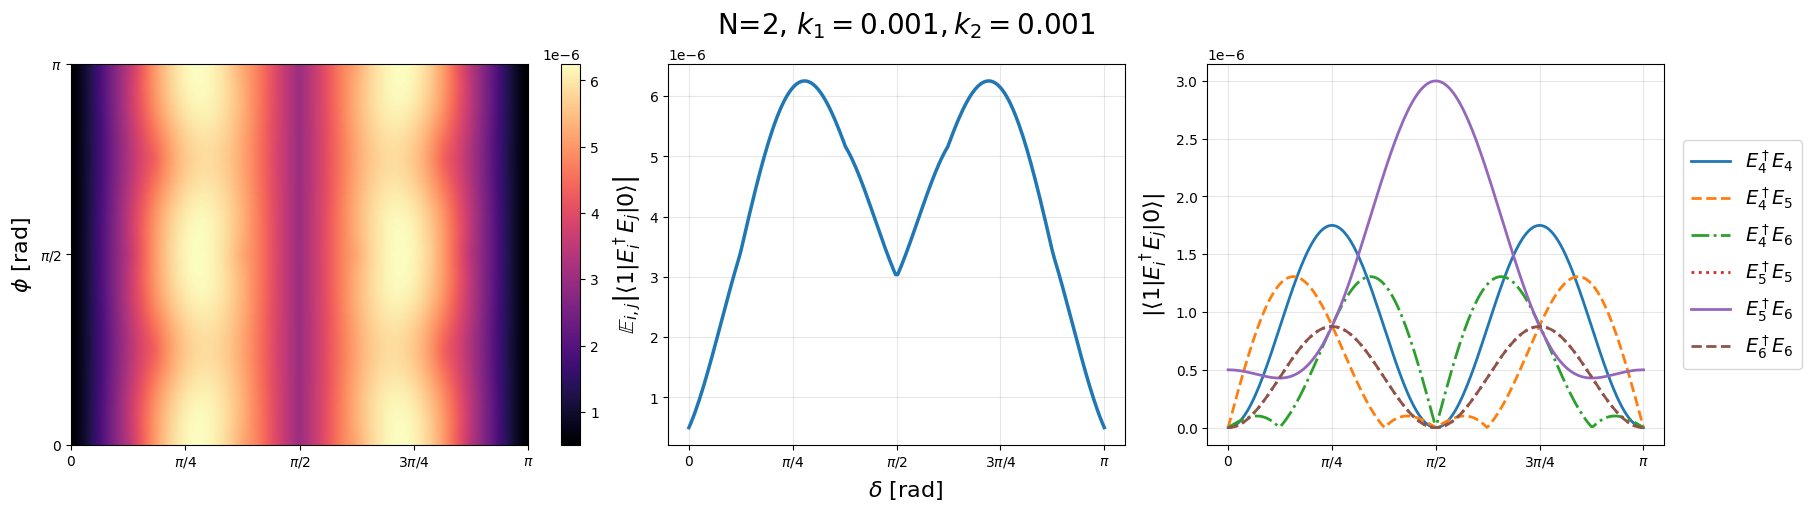

In [ ]:

k1 = 0.01
k2 = 0.01
t  = 1.0 
# ========================================== 

def calculate_terms(delta, phi, k1, k2, t, mode='01'):
    k1c, k2c, tc = k1, k2, t
    s2_sq = np.sin(2.0 * delta)**2
    s_delta = np.sin(delta)
    c_delta = np.cos(delta)
    sqrt_k1t = np.sqrt(k1c * tc)
    sqrt_k2t = np.sqrt(k2c * tc)
    k1t = k1c * tc
    k2t = k2c * tc
    exp_neg_i_phi = np.exp(-1j * phi)
    exp_neg_2i_phi = np.exp(-2j * phi)
    exp_neg_3i_phi = np.exp(-3j * phi)
    exp_4i_phi = np.exp(4j * phi)
    
    terms = {} 
    
    if mode == '01':
        factor = (6 + exp_4i_phi)
    else:
        factor = (1 + 6 * exp_4i_phi)
        
    val_00 = 0.125 * tc**2 * exp_neg_2i_phi * factor * s2_sq * (k1c - k2c)**2
    terms["$E_1^\\dagger E_1$"] = np.abs(val_00)

    val_11 = -k1c * tc**2 * exp_neg_2i_phi * factor * s_delta**2 * c_delta**2 * (k1c - k2c)
    terms["$E_2^\\dagger E_2$"] = np.abs(val_11)

    if mode == '01':
        bracket = (-6 * c_delta**2 + exp_4i_phi * s_delta**2)
    else:
        bracket = (-c_delta**2 + 6 * exp_4i_phi * s_delta**2)
    val_12 = tc * exp_neg_i_phi * s_delta * c_delta * (k1c - k2c) * sqrt_k1t * sqrt_k2t * bracket
    terms["$E_2^\\dagger E_3$"] = np.abs(val_12)

    val_22 = k2c * tc**2 * exp_neg_2i_phi * factor * s_delta**2 * c_delta**2 * (k1c - k2c)
    terms["$E_3^\\dagger E_3$"] = np.abs(val_22)

    val_33 = -k1c * k2c * tc**2 * exp_neg_2i_phi * factor * s_delta**2 * c_delta**2
    terms["$E_4^\\dagger E_4$"] = np.abs(val_33)

    if mode == '01':
        bracket_34 = (-6 * s_delta**2 + exp_4i_phi * c_delta**2)
    else:
        bracket_34 = (-s_delta**2 + 6 * exp_4i_phi * c_delta**2)
    val_34 = (exp_neg_3i_phi * s_delta * c_delta * (k1t)**1.5 * sqrt_k2t * bracket_34) / np.sqrt(2.0)
    terms["$E_4^\\dagger E_5$"] = np.abs(val_34)

    if mode == '01':
        val_35 = (exp_neg_i_phi * s_delta * c_delta * sqrt_k1t * (k2t)**1.5 * (-6 * c_delta**2 + exp_4i_phi * s_delta**2)) / np.sqrt(2.0)
    else:
        val_35 = -(exp_neg_i_phi * s_delta * c_delta * sqrt_k1t * (k2t)**1.5 * (c_delta**2 - 6 * exp_4i_phi * s_delta**2)) / np.sqrt(2.0)
    terms["$E_4^\\dagger E_6$"] = np.abs(val_35)

    val_44 = 0.125 * k1c**2 * tc**2 * exp_neg_2i_phi * factor * s2_sq
    terms["$E_5^\\dagger E_5$"] = np.abs(val_44)

    if mode == '01':
        bracket_45 = (6 * c_delta**4 + exp_4i_phi * s_delta**4)
    else:
        bracket_45 = (c_delta**4 + 6 * exp_4i_phi * s_delta**4)
    val_45 = 0.5 * k1c * k2c * tc**2 * bracket_45
    terms["$E_5^\\dagger E_6$"] = np.abs(val_45)

    val_55 = 0.125 * k2c**2 * tc**2 * exp_neg_2i_phi * factor * s2_sq
    terms["$E_6^\\dagger E_6$"] = np.abs(val_55)

    Z_sum = np.zeros_like(delta, dtype=np.float64)
    for key in terms:
        Z_sum += terms[key]
    return Z_sum, terms

# ========================================== 
delta_vals = np.linspace(0, np.pi, 200)
phi_vals = np.linspace(0, np.pi, 200) 
Delta, Phi = np.meshgrid(delta_vals, phi_vals)

# Data 01
Z_01, terms_grid_01 = calculate_terms(Delta, Phi, k1, k2, t, mode='01')
phi_idx = np.argmin(np.abs(phi_vals - 0.0))
Z_01_phi0 = Z_01[phi_idx, :]
terms_plot_01 = {k: v[phi_idx, :] for k, v in terms_grid_01.items()}

# Data 10
Z_10, terms_grid_10 = calculate_terms(Delta, Phi, k1, k2, t, mode='10')
Z_10_phi0 = Z_10[phi_idx, :]
terms_plot_10 = {k: v[phi_idx, :] for k, v in terms_grid_10.items()}

# ========================================== 
def plot_offdiag_analysis(Z_heatmap, Z_slice, terms_dict, mode_str, k1, k2):
    
    if mode_str == '01': 
        slice_ylabel = r"$\mathbb{E}_{i,j} \left| \langle 0|E_i^\dagger E_j|1\rangle \right|$"
        terms_ylabel = r"$|\langle 0|E_i^\dagger E_j|1\rangle|$"
        main_title_str = rf"N=2, $k_1={k1}, k_2={k2}$"
    else: 
        slice_ylabel = r"$\mathbb{E}_{i,j} \left| \langle 1|E_i^\dagger E_j|0\rangle \right|$"
        terms_ylabel = r"$|\langle 1|E_i^\dagger E_j|0\rangle|$"
        main_title_str = rf"N=2, $k_1={k1}, k_2={k2}$"
 
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
    fig.subplots_adjust(top=0.85, bottom=0.15, left=0.06, right=0.93, wspace=0.25)

    common_cmap = "magma"
    slice_color = "tab:blue"
    
    ticks_pi = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
    ticklabels_pi = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]

    # --- 1. Heatmap ---
    ax = axes[0]
    im = ax.imshow(Z_heatmap, origin="lower", extent=[0, np.pi, 0, np.pi], aspect="auto", cmap=common_cmap)
    ax.set_xticks(ticks_pi)
    ax.set_xticklabels(ticklabels_pi)
    ax.set_yticks([0, np.pi/2, np.pi])
    ax.set_yticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
    ax.set_ylabel(r"$\phi\ \mathrm{[rad]}$", fontsize=16)
      
    cbar = fig.colorbar(im, ax=ax, location='right', pad=0.02)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()

    # --- 2. Slice Plot ---
    ax = axes[1]
    ax.plot(delta_vals, Z_slice, '-', linewidth=2.5, color=slice_color)
    ax.set_xticks(ticks_pi)
    ax.set_xticklabels(ticklabels_pi)
    ax.set_ylabel(slice_ylabel, fontsize=16) 
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax.grid(True, alpha=0.3)

    # --- 3. Terms Plot ---
    ax = axes[2]
    colors = plt.cm.tab10.colors
    linestyles = ['-', '--', '-.', ':'] * 3
    
    color_idx = 0
    threshold = 1e-15
    sorted_keys = sorted(terms_dict.keys())
    
    for name in sorted_keys:
        vals = terms_dict[name]
        if np.max(np.abs(vals)) > threshold:
            ax.plot(delta_vals, vals, label=name, 
                    color=colors[color_idx % 10], 
                    linestyle=linestyles[color_idx % 4],
                    linewidth=2.0)
            color_idx += 1
            
    ax.set_xticks(ticks_pi)
    ax.set_xticklabels(ticklabels_pi)
    ax.set_ylabel(terms_ylabel, fontsize=16) 
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', fontsize=14, frameon=True)
    fig.suptitle(main_title_str, fontsize=20)

    return fig

fig1 = plot_offdiag_analysis(Z_01, Z_01_phi0, terms_plot_01, '01', k1, k2)
fig1.supxlabel(r"$\delta\ \mathrm{[rad]}$", fontsize=16)
fig1.savefig('N2_OffDiag_01.png', dpi=600, bbox_inches='tight')

fig2 = plot_offdiag_analysis(Z_10, Z_10_phi0, terms_plot_10, '10', k1, k2)
fig2.supxlabel(r"$\delta\ \mathrm{[rad]}$", fontsize=16)
fig2.savefig('N2_OffDiag_10.png', dpi=600, bbox_inches='tight')

plt.show()

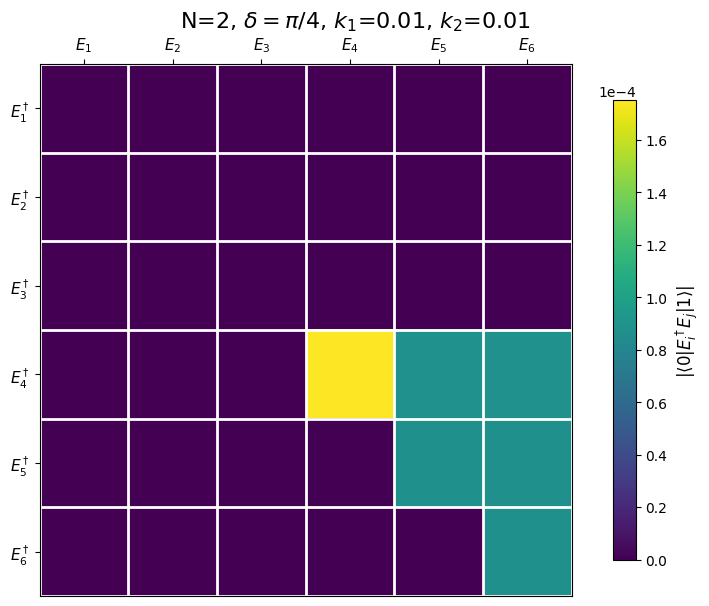

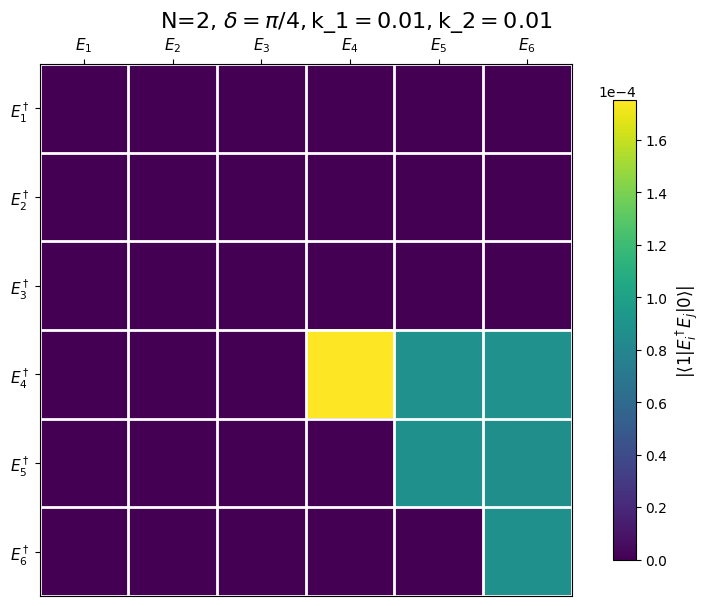

In [113]:

k1 = 0.01
k2 = 0.01  
t  = 1.0 
phi_val = 0.0
delta_val = np.pi / 4  

# ==========================================
 
delta_label = format_delta_label(delta_val)

def code1_offdiagonal_matrix(delta, phi, k1, k2, t):
  
    k1c, k2c, tc = k1, k2, t
    c2 = np.cos(2.0 * delta)
    c4 = np.cos(4.0 * delta)
    s2 = np.sin(2.0 * delta)
    s2_sq = np.sin(2.0 * delta)**2
    s_delta = np.sin(delta)
    c_delta = np.cos(delta)
    sqrt_k1t = np.sqrt(k1c * tc)
    sqrt_k2t = np.sqrt(k2c * tc)
    k1t = k1c * tc
    k2t = k2c * tc
    
    matrix_01 = np.zeros((6, 6), dtype=np.complex128)
    matrix_10 = np.zeros((6, 6), dtype=np.complex128)
    
    # E1dE1
    exp_neg_2i_phi = np.exp(-2j * phi)
    exp_4i_phi = np.exp(4j * phi)
    matrix_01[0, 0] = 0.125 * tc**2 * exp_neg_2i_phi * (6 + exp_4i_phi) * s2_sq * (k1c - k2c)**2
    matrix_10[0, 0] = 0.125 * tc**2 * exp_neg_2i_phi * (1 + 6 * exp_4i_phi) * s2_sq * (k1c - k2c)**2
    
    # E2dE2
    matrix_01[1, 1] = -k1c * tc**2 * exp_neg_2i_phi * (6 + exp_4i_phi) * s_delta**2 * c_delta**2 * (k1c - k2c)
    matrix_10[1, 1] = -k1c * tc**2 * exp_neg_2i_phi * (1 + 6 * exp_4i_phi) * s_delta**2 * c_delta**2 * (k1c - k2c)
    
    # E2dE3 
    exp_neg_i_phi = np.exp(-1j * phi)
    matrix_01[1, 2] = tc * exp_neg_i_phi * s_delta * c_delta * (k1c - k2c) * sqrt_k1t * sqrt_k2t * (-6 * c_delta**2 + exp_4i_phi * s_delta**2)
    matrix_10[1, 2] = tc * exp_neg_i_phi * s_delta * c_delta * (k1c - k2c) * sqrt_k1t * sqrt_k2t * (-c_delta**2 + 6 * exp_4i_phi * s_delta**2)
    
    # E3dE3
    matrix_01[2, 2] = k2c * tc**2 * exp_neg_2i_phi * (6 + exp_4i_phi) * s_delta**2 * c_delta**2 * (k1c - k2c)
    matrix_10[2, 2] = k2c * tc**2 * exp_neg_2i_phi * (1 + 6 * exp_4i_phi) * s_delta**2 * c_delta**2 * (k1c - k2c)
    
    # E4dE4 
    matrix_01[3, 3] = -k1c * k2c * tc**2 * exp_neg_2i_phi * (6 + exp_4i_phi) * s_delta**2 * c_delta**2
    matrix_10[3, 3] = -k1c * k2c * tc**2 * exp_neg_2i_phi * (1 + 6 * exp_4i_phi) * s_delta**2 * c_delta**2
    
    # E4dE5
    exp_neg_3i_phi = np.exp(-3j * phi)
    matrix_01[3, 4] = (exp_neg_3i_phi * s_delta * c_delta * (k1t)**1.5 * sqrt_k2t * (-6 * s_delta**2 + exp_4i_phi * c_delta**2)) / np.sqrt(2.0)
    matrix_10[3, 4] = (exp_neg_3i_phi * s_delta * c_delta * (k1t)**1.5 * sqrt_k2t * (-s_delta**2 + 6 * exp_4i_phi * c_delta**2)) / np.sqrt(2.0)
    
    # E4dE6 (index 3,5)
    matrix_01[3, 5] = (exp_neg_i_phi * s_delta * c_delta * sqrt_k1t * (k2t)**1.5 * (-6 * c_delta**2 + exp_4i_phi * s_delta**2)) / np.sqrt(2.0)
    matrix_10[3, 5] = -(exp_neg_i_phi * s_delta * c_delta * sqrt_k1t * (k2t)**1.5 * (c_delta**2 - 6 * exp_4i_phi * s_delta**2)) / np.sqrt(2.0)
    
    # E5dE5 
    matrix_01[4, 4] = 0.125 * k1c**2 * tc**2 * exp_neg_2i_phi * (6 + exp_4i_phi) * s2_sq
    matrix_10[4, 4] = 0.125 * k1c**2 * tc**2 * exp_neg_2i_phi * (1 + 6 * exp_4i_phi) * s2_sq
    
    # E5dE6 
    exp_2i_phi = np.exp(2j * phi)
    matrix_01[4, 5] = 0.5 * k1c * k2c * tc**2 * (6 * c_delta**4 + exp_4i_phi * s_delta**4)
    matrix_10[4, 5] = 0.5 * k1c * k2c * tc**2 * (c_delta**4 + 6 * exp_4i_phi * s_delta**4)
    
    # E6dE6
    matrix_01[5, 5] = 0.125 * k2c**2 * tc**2 * exp_neg_2i_phi * (6 + exp_4i_phi) * s2_sq
    matrix_10[5, 5] = 0.125 * k2c**2 * tc**2 * exp_neg_2i_phi * (1 + 6 * exp_4i_phi) * s2_sq
    
    return np.abs(matrix_01), np.abs(matrix_10)

# ==========================================

matrix_01_code1, matrix_10_code1 = code1_offdiagonal_matrix(delta_val, phi_val, k1, k2, t)

# ==========================================
tick_labels_x = [f'$E_{i}$' for i in range(1, 7)]
tick_labels_y = [f'$E_{i}^\\dagger$' for i in range(1, 7)]

vmin = 1e-10
vmax = max(np.max(matrix_01_code1), np.max(matrix_10_code1))
if vmax < vmin: vmax = 1.0

# <0|O|1> elements
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 6), constrained_layout=True)

im1 = ax1.imshow(matrix_01_code1, origin='upper', cmap='viridis')
ax1.set_xticks(np.arange(6))
ax1.set_yticks(np.arange(6))
ax1.set_xticklabels(tick_labels_x, fontsize=11)
ax1.set_yticklabels(tick_labels_y, fontsize=11)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.set_xticks(np.arange(7) - 0.5, minor=True)
ax1.set_yticks(np.arange(7) - 0.5, minor=True)
ax1.grid(which="minor", color="w", linestyle='-', linewidth=2)
ax1.tick_params(which="minor", bottom=False, left=False, top=False)
cbar1 = fig1.colorbar(im1, ax=ax1, shrink=0.8)
formatter1 = ScalarFormatter(useMathText=False)
formatter1.set_scientific(True)
formatter1.set_powerlimits((0, 0))
cbar1.ax.yaxis.set_major_formatter(formatter1)
cbar1.set_label(r'$|\langle 0|E_i^\dagger E_j|1\rangle|$', fontsize=12) 
plt.suptitle(rf'N=2, $\delta={delta_label}$, $k_1$={k1}, $k_2$={k2}', fontsize=16, y=1.02)
fig1.savefig('off_diagonal_code1_01.png', dpi=600, bbox_inches='tight')

plt.show()

# <1|O|0> elements
fig2, ax2 = plt.subplots(1, 1, figsize=(7, 6), constrained_layout=True)

im2 = ax2.imshow(matrix_10_code1, origin='upper', cmap='viridis')
ax2.set_xticks(np.arange(6))
ax2.set_yticks(np.arange(6))
ax2.set_xticklabels(tick_labels_x, fontsize=11)
ax2.set_yticklabels(tick_labels_y, fontsize=11)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.set_xticks(np.arange(7) - 0.5, minor=True)
ax2.set_yticks(np.arange(7) - 0.5, minor=True)
ax2.grid(which="minor", color="w", linestyle='-', linewidth=2)
ax2.tick_params(which="minor", bottom=False, left=False, top=False)
cbar2 = fig2.colorbar(im2, ax=ax2, shrink=0.8)
formatter2 = ScalarFormatter(useMathText=False)
formatter2.set_scientific(True)
formatter2.set_powerlimits((0, 0))
cbar2.ax.yaxis.set_major_formatter(formatter2)
cbar2.set_label(r'$|\langle 1|E_i^\dagger E_j|0 \rangle|$', fontsize=12) 
plt.suptitle(rf'N=2, $\delta={delta_label}, $k_1$={k1}, $k_2$={k2}$', fontsize=16, y=1.02) 
fig2.savefig('off_diagonal_code1_10.png', dpi=600, bbox_inches='tight')

plt.show()
